# Regression

## Simple Linear Regression

In [16]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [9]:
input_file = './exampleDatasets/data_singlevar_regr.txt'

In [10]:
data = np.loadtxt(input_file, delimiter = ',')

In [12]:
X, y = data[:, :-1], data[:, -1]

Manual train test split of dataset

In [17]:
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [20]:
x_train, y_train = X[: num_training], y[: num_training]
x_test, y_test = X[num_training:], y[num_training:]

Instantiate a regressor

In [21]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_test_pred = regressor.predict(x_test)

Now let's plot the outputs

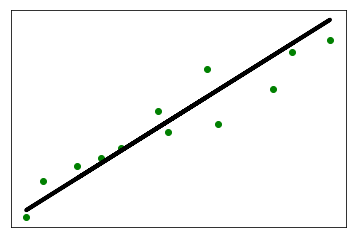

In [25]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, y_test_pred, color = 'black', linewidth = 4)
plt.xticks(())
plt.yticks(())
plt.show()

And compute some metrics for model validation

In [27]:
print('MAD: {}'.format(sm.mean_absolute_error(y_test, y_test_pred)))
print('MSE: {}'.format(sm.mean_squared_error(y_test, y_test_pred)))
print('MedAD: {}'.format(sm.median_absolute_error(y_test, y_test_pred)))
print('Explained Variance: {}'.format(sm.explained_variance_score(y_test, y_test_pred)))
print('R2 score: {}'.format(sm.r2_score(y_test, y_test_pred)))

MAD: 0.5929016124297125
MSE: 0.4884945644836102
MedAD: 0.5135077475673313
Explained Variance: 0.8610987885274577
R2 score: 0.8585327510951146


## Multivariable Linear Regression

In [32]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [29]:
input_file = './exampleDatasets/data_multivar_regr.txt'
data = np.loadtxt(input_file, delimiter = ',')

In [30]:
x, y = data[:, :-1], data[:, -1]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Instantiate another linear regressor

In [45]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
y_test_pred = linear_regressor.predict(x_test)

In [47]:
print('MAD: {}'.format(sm.mean_absolute_error(y_test, y_test_pred)))
print('MSE: {}'.format(sm.mean_squared_error(y_test, y_test_pred)))
print('MedAD: {}'.format(sm.median_absolute_error(y_test, y_test_pred)))
print('Explained Variance: {}'.format(sm.explained_variance_score(y_test, y_test_pred)))
print('R2 score: {}'.format(sm.r2_score(y_test, y_test_pred)))

MAD: 3.594451440834658
MSE: 20.33427290701101
MedAD: 3.0136115060105992
Explained Variance: 0.8581196737580239
R2 score: 0.8576748891445858


## Polynomial regression

In [48]:
polynomial = PolynomialFeatures(degree = 10)

This creates a new feature matrix using a combination of higher degrees up to 10. There is a great link [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html) explaining why we do this along with other pre-processing techniques.

In [59]:
x_train_transformed = polynomial.fit_transform(x_train)

In [61]:
datapoint = [[7.75, 6.35, 5.56]]
poly_datapoint = polynomial.fit_transform(datapoint)

In [62]:
data[10]

array([ 7.66,  6.29,  5.66, 41.35])

We can see that data we just created is very close to this one within the data. So a good predictor would output something close to 41.35

In [64]:
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(x_train_transformed, y_train)
print('\nLinear regression: ', linear_regressor.predict(datapoint))
print('\nPolynomial regression: ', poly_linear_model.predict(poly_datapoint))


Linear regression:  [36.0022381]

Polynomial regression:  [40.03611764]


We can see that the polynomial gives us a better estimation of that particular datapoint

## Support Vector Regressor

In [73]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

In [74]:
data = datasets.load_boston()
X, y = shuffle(data.data, data.target, random_state = 7)

Shuffling is done so that the analysis won't be biased. Find out what shuffling does.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

C parameter represents the penalty for training error. Higher C can fit the training set more accurately but may cause overfitting. Epsilon parameter specifies a threshold where there is no penalty for training error if the predicted value is within this distance from the actual.

In [76]:
sv_regressor = SVR(kernel = 'linear', C = 1.0, epsilon = 0.1)
sv_regressor.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
y_test_pred = sv_regressor.predict(x_test)

In [79]:
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
print("\n#### Performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Performance ####
Mean squared error = 30.0
Explained variance score = 0.54
